<a href="https://colab.research.google.com/github/simon2016bht/PlotWisely/blob/main/LineChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:

Radovan Kavicky/2022-07-01 Making Economist Style Plots in Matplotlib

Economist

Storytelling with Data: A Data Visualization Guide for Business Professionals 1st Edition by Cole Nussbaumer Knaflic

Matplotlib API Reference

## Line chart

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes out plots higher resolution, which makes them easier to see while building
plt.rcParams['figure.dpi'] = 100
gdp = pd.read_csv('gdp_1960_2020.csv') #https://www.kaggle.com/holoong9291/gdp-of-all-countries19602020/version/3
gdp['gdp_trillions'] = gdp['gdp'] / 1_000_000_000_000
#gdp.head()
gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[gdp['state'] == 'Asia'].tail()

<ipython-input-3-332ea7da31e7>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[gdp['state'] == 'Asia'].tail()


,year,rank,country,state,gdp,gdp_percent,gdp_trillions
9977,2020,19,Saudi Arabia,Asia,700117873249,0.009029,0.700118
9973,2020,15,Indonesia,Asia,1058423838345,0.013650,1.058424
9967,2020,9,South Korea,Asia,1630525005469,0.021028,1.630525
9963,2020,5,India,Asia,2622983732006,0.033827,2.622984
9960,2020,2,China,Asia,14722730697890,0.189870,14.722731


In [4]:
countries = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]['country'].values
#countries
gdp['date'] = pd.to_datetime(gdp['year'], format='%Y')


<ipython-input-5-59cb1d53fe5b>:35: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax.set_xlim(pd.datetime(1958, 1, 1), pd.datetime(2023, 1, 1))
<ipython-input-5-59cb1d53fe5b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,25,5),            # Set labels again


Text(0.12, 0.01, 'Source: "GDP of all countries(1960-2020)" via Kaggle.com')

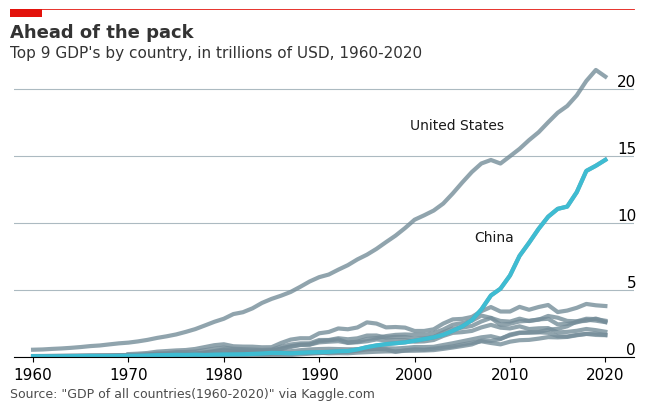

In [5]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(8,4))

# Create grid
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Plot data
# Loop through country names and plot each one.
for country in countries:
    ax.plot(gdp[gdp['country'] == country]['date'],
            gdp[gdp['country'] == country]['gdp_trillions'],
            color='#758D99',
            alpha=0.8,
            linewidth=3)

# Plot US and China separately
ax.plot(gdp[gdp['country'] == 'United States']['date'],
        gdp[gdp['country'] == 'United States']['gdp_trillions'],
        color='#006BA2',
        linewidth=3)

ax.plot(gdp[gdp['country'] == 'China']['date'],
        gdp[gdp['country'] == 'China']['gdp_trillions'],
        color='#3EBCD2',
        linewidth=3)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Shrink y-lim to make plot a bit tigheter
ax.set_ylim(0, 23)

# Set xlim to fit data without going over plot area
ax.set_xlim(pd.datetime(1958, 1, 1), pd.datetime(2023, 1, 1))

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labelsize=11)        # Set tick label size

# Reformat y-axis tick labels
ax.set_yticklabels(np.arange(0,25,5),            # Set labels again
                   ha = 'right',                 # Set horizontal alignment to right
                   verticalalignment='bottom')   # Set vertical alignment to make labels on top of gridline

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put y-axis labels on top
                         labelbottom=False,  # Set no y-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11)       # Set tick label size

# Add labels for USA and China
ax.text(x=.62, y=.68, s='United States', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.7, y=.4, s='China', transform=fig.transFigure, size=10, alpha=.9)


# Add in line and tag
ax.plot([0.12, .9],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False,
        color='#E3120B',
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B',
                           transform=fig.transFigure,
                           clip_on=False,
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.91, s="Ahead of the pack", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Top 9 GDP's by country, in trillions of USD, 1960-2020", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=0.01, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

